## Support session # 1

## 0. Introduction

In [ ]:
# Support session

**What’s the purpose of Linear Regression ?**
Suppose that you have a dataset containing:
- **1000 records**, each of which is composed of **10 features.** 
- **1000 labels** which correspond to the records



This dataset can be represented very simply with a 1000x10 matrix. 

**Question 1:** Please create a random Matrix with numpy

**Question 2:**  What is the mean squared error ? Is it a cost function? What is the difference with an objective function?

**Question 3:** Suppose you must minimize the MSE, what doe sit implies for the predictions?

**Question 4:** What is a convex function?

**Question 5:** Suppose you have a graph of a convex function, the training of a linear regression can be symbolized like below, if teh algorithm is iterative.
What i sthe gradient of the Cost Function @ the orange point

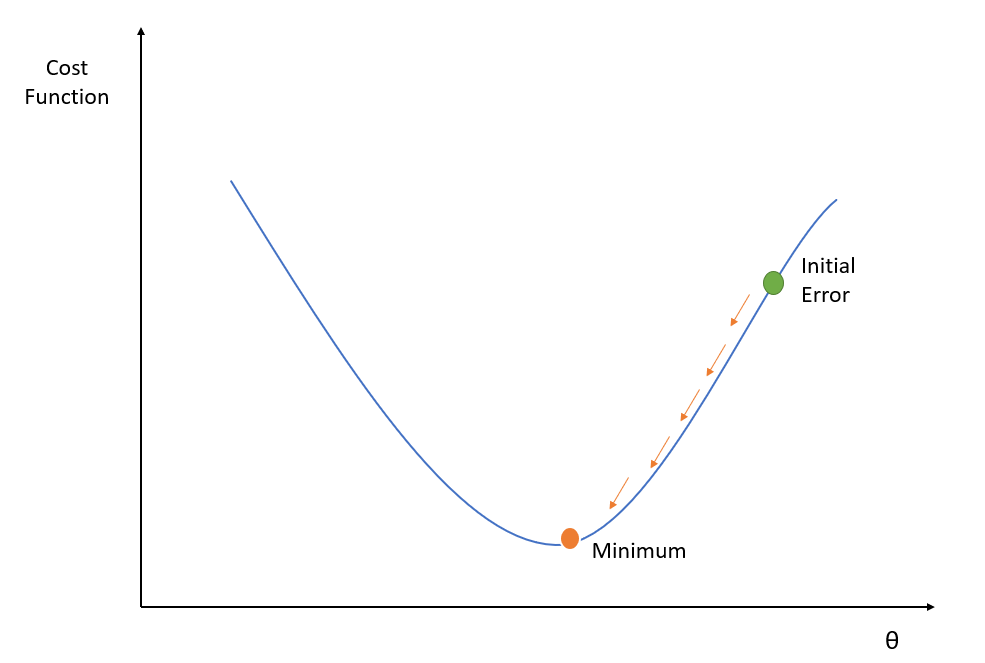

**Question 5:** Suppose you have a graph of a convex function, the training of a linear regression can be symbolized like below, if the algorithm is iterative.
What sign is the gradient of the Cost Function @ the green point

**Question 6:** suppose you are at the green point and u add the gradient of the cost function, in which direction you go?

**Question 7:** Suppose your equation is of type:
$$ y =m.x +p$$

*What is the expression of the derivative of y with regard to x and p ?*

**Question 8:** Suppose your objective function is the MSE:
You want to calculate the derivatives of the MSE regarding to its param
$$ \frac{\partial{MSE}}{\partial{param_{i}}}$$

*What is the expression of the derivative of MSE with regard to the parameters of the linear regression ?*

**Question 9** : We will use numpy implementation, as such we must favour multiplications.

we mustrewrite:

$$ y = mx + p $$

so that the equation becomes: $$ y = m'.x' $$  but still retain the same information.

How should you modify $X$ and $m$ so that the operations are simply multiplications? 

**Question10:** 
Build a dataset of size 10000,10
in order to create a #working example#
we are not picking a random y.
we are going to multiply m parameters with X and we are going to add random noise.
- from there we have X and y

In [ ]:
import numpy as np

X = np.random.rand(10000,10) #we create 10K observations of size 10000*10

m = np.random.randint(low = 1, high = 20,size = (10,1))  # these are the parameters in y= mx+p

q = np.random.rand(1) # intercept

y = (X @ m) + q # the @ sign is the dot product

In [ ]:
# shape of the vector resulting from linear regression
y.shape

(10000, 1)

In [ ]:
# we are going to add a bit of noise
noise = np.random.randn(y.shape[0], y.shape[1])
y = y + noise

In [ ]:
# this is our y (labels)
y.shape

(10000, 1)

In [ ]:
# this is our X (observations)
X.shape

(10000, 10)

### Implementing the notation trick: 
* Dans l'équation $$y=m.x +p$$ $X$ devient:

$$ x_{1},x_{1},x_{2},x_{3},x_{4},x_{5},x_{6},x_{7},x_{1},x_{8},x_{9},x_{10} $$
est modifié en:

$$ 1,x_{1},x_{1},x_{2},x_{3},x_{4},x_{5},x_{6},x_{7},x_{1},x_{8},x_{9},x_{10} $$

**question 11** :Que devient m ? combien y a til de paramètres à présent ?

In [ ]:
import numpy as np

X = np.random.rand(10000,10)
m = np.random.randint(low = 1, high = 20,size = (10,1))  #parametri random tra low e high
q = np.random.rand(1)
y = (X @ m) + q 

noise = np.random.randn(y.shape[0], y.shape[1])
y = y + noise

print(f"observations shape: {X.shape}")
print(f"parameters shape: {m.shape}")
print(f"intercept shape: {m.shape}")
print(f"labels shape: {y.shape}")


observations shape: (10000, 10)
parameters shape: (10, 1)
intercept shape: (10, 1)
labels shape: (10000, 1)


In [ ]:
X = np.concatenate([X , np.ones((X.shape[0],1))], axis = 1) # notation trick
m = np.concatenate([m,q.reshape(1,-1)],axis = 0) # m a augmenté d'une dimension avec un nouveau paramètre: q$
print("************************")
print("after the format trick:")
print("************************")

print(f"observations shape: {X.shape}")
print(f"parameters shape: {m.shape}")
print(f"intercept shape: {m.shape}")
print(f"labels shape: {y.shape}")

************************
after the format trick:
************************
observations shape: (10000, 11)
parameters shape: (11, 1)
intercept shape: (11, 1)
labels shape: (10000, 1)


## 1. Time for derivatives:

**Question 12** : What should we take the derivative of ?
What are the parameters, How many are they ?
Does this calculation  takes into account the number of samples?


In [ ]:
def partial_derivative(X_batch, y_batch, m_stat):

  y_pred = X_batch @ m_stat
  n = len(X_batch)

  df_dm =  (-2/n) * (X_batch.T @ (y_batch - y_pred))
  df_dm = df_dm.reshape(len(df_dm),-1) #dimensions: (nparams,1)

  return df_dm

## Loss function? Objective function ?

**Question 13:** Write a function which calculates the $mse$

In [ ]:
def mean_squared_error(X,y,m_stat):
  y_pred = X @ m_stat
  mse = np.sum(((y_pred - y)**2),axis = 0) / len(X)
  
  return mse

## 2. Time to nut or shut up: Gradient descent

**Question 14** Write the training function 

You can notice from the formulas above that there is a summation ( MSE & its derivatives).
The algorithm indicates that we should update the parameters θ only after summing over all the n records, that is after having gone through all the records of the dataset. 
 this requires to accumulate the gradients.

In [ ]:
def training(X, y, batch_size, lr, epochs):
  
  for epoch in range(epochs):

    # at the first step we don't know the m parameters
    # we initialize them with random initial statistics
    if epoch == 0:
      m_stat = np.random.rand(X.shape[1],1)

    # we want to shuffle data
    # and you MUST shuffle X and y using same permutation
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # X and y are shuffled.
    X = X[indices]
    y = y[indices]

    # store cymulative derivative
    cumulative_derivative = np.zeros((X.shape[1],1))

    # iteration over each batch (accumulation of the gradient)
    for batch in range(len(X)//batch_size):
      start = batch*batch_size
      stop = (batch*batch_size) + batch_size

      X_batch = X[start:stop]
      y_batch = y[start:stop]
      
      #derivative
      cumulative_derivative = cumulative_derivative + partial_derivative(X_batch, y_batch, m_stat)

      #updating rule
      m_stat = m_stat - (lr*cumulative_derivative)
    
    # in this case we do the update of the parameters after seing the WHOLE dataset
    print(f"epoch: {epoch} ----> MSE: {mean_squared_error(X,y,m_stat)}")
      
  return m_stat

In [ ]:
training(X, y, batch_size=16, lr=0.005, epochs=10)

epoch: 0 ----> MSE: [259.42345383]
epoch: 1 ----> MSE: [73.82373637]
epoch: 2 ----> MSE: [99.35235866]
epoch: 3 ----> MSE: [40.008674]
epoch: 4 ----> MSE: [77.15771572]
epoch: 5 ----> MSE: [25.83041923]
epoch: 6 ----> MSE: [21.98522103]
epoch: 7 ----> MSE: [16.76193235]
epoch: 8 ----> MSE: [20.51868108]
epoch: 9 ----> MSE: [17.46264306]


array([[22.02811352],
       [18.26126514],
       [20.0826217 ],
       [ 8.01986118],
       [ 1.16041231],
       [22.14285776],
       [16.47151471],
       [ 8.02449053],
       [12.98636965],
       [ 5.6144818 ],
       [-6.64484928]])

## 3. Beyond Gradient descent : Stochastic Gradient descent

**Question 15** Write the training function 

In [ ]:
def training_step(X, y, batch_size, lr, epochs):
  
  for epoch in range(epochs):

    # at the first step we don't know the m parameters
    # we initialize them with random initial statistics
    if epoch == 0:
      m_stat = np.random.rand(X.shape[1],1)
      print(m_stat.shape)

    # we want to shuffle data
    # and you MUST shuffle X and y using same permutation
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # X and y are shuffled.
    X = X[indices]
    y = y[indices]

    # store cymulative derivative
    cumulative_derivative = np.zeros((X.shape[1],1))

    # iteration over each batch (accumulation of the gradient)
    for batch in range(len(X)//batch_size):
      start = batch*batch_size
      stop = (batch*batch_size) + batch_size

      X_batch = X[start:stop]
      y_batch = y[start:stop]
      
      #derivative
      stochastic_derivative = partial_derivative(X_batch, y_batch, m_stat)
      print(stochastic_derivative.shape)
      print(m_stat.shape)
      break
      #updating rule
      m_stat = m_stat - (lr*stochastic_derivative)

      # in this case we do the update of the parameters after seing the batch
      step_mse = mean_squared_error(X,y,m_stat)

    
    print(f"epoch: {epoch} ----> MSE: {mean_squared_error(X,y,m_stat)}")
      
  return m_stat

In [ ]:
X.shape

(10000, 11)

In [ ]:
training_step(X, y, batch_size=16, lr=0.05, epochs=10)

(11, 1)
(11, 1)
(11, 1)
epoch: 0 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 1 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 2 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 3 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 4 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 5 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 6 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 7 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 8 ----> MSE: [3921.30520824]
(11, 1)
(11, 1)
epoch: 9 ----> MSE: [3921.30520824]


array([[0.41804787],
       [0.0212246 ],
       [0.36302031],
       [0.06696082],
       [0.14442013],
       [0.09377022],
       [0.82828153],
       [0.7941903 ],
       [0.16911351],
       [0.23716427],
       [0.2029325 ]])

**Question 16:**  Can you summarize what happened ? 
- Did Pr Malot use this approach, if not what did she use ? 
- How is it called ? 
- What are the advantages ?/disadvantages ?